## Addition in quantum computing

#### T. Draper (2000), Addition on a quantum computer, quant-ph/0008033.

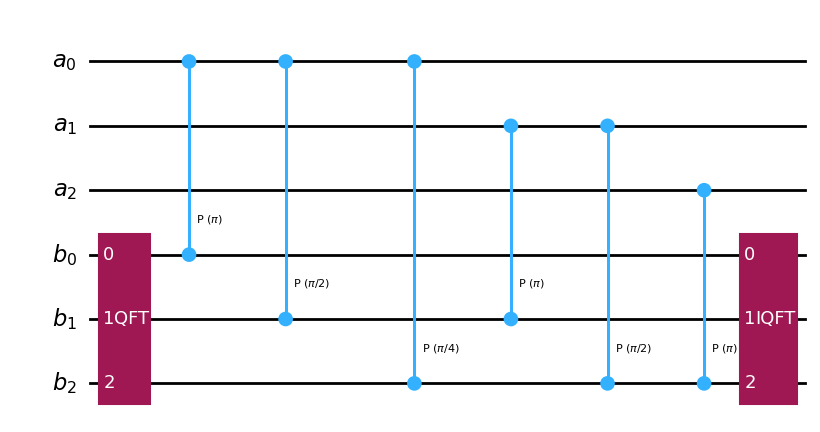

In [172]:
import itertools
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import DraperQFTAdder

backend = AerSimulator()
adder = DraperQFTAdder(3).decompose()

adder.draw(output='mpl')

In [173]:
for l in list(itertools.product([0, 1], repeat=6)):
    qc = QuantumCircuit(6)
    
    for i, bit in enumerate(l):
        if bit == 1: 
            qc.x(i)
    qc.append(adder, [0, 1, 2, 3, 4, 5])
    qc = qc.reverse_bits()
    qc.measure_all()
    
    
    job = backend.run(transpile(qc, backend), shots=1024)
    print(f"Input: {l}. Result: {job.result().get_counts()}")

Input: (0, 0, 0, 0, 0, 0). Result: {'000000': 1024}
Input: (0, 0, 0, 0, 0, 1). Result: {'000001': 1024}
Input: (0, 0, 0, 0, 1, 0). Result: {'000010': 1024}
Input: (0, 0, 0, 0, 1, 1). Result: {'000011': 1024}
Input: (0, 0, 0, 1, 0, 0). Result: {'000100': 1024}
Input: (0, 0, 0, 1, 0, 1). Result: {'000101': 1024}
Input: (0, 0, 0, 1, 1, 0). Result: {'000110': 1024}
Input: (0, 0, 0, 1, 1, 1). Result: {'000111': 1024}
Input: (0, 0, 1, 0, 0, 0). Result: {'001001': 1024}
Input: (0, 0, 1, 0, 0, 1). Result: {'001000': 1024}
Input: (0, 0, 1, 0, 1, 0). Result: {'001011': 1024}
Input: (0, 0, 1, 0, 1, 1). Result: {'001010': 1024}
Input: (0, 0, 1, 1, 0, 0). Result: {'001101': 1024}
Input: (0, 0, 1, 1, 0, 1). Result: {'001100': 1024}
Input: (0, 0, 1, 1, 1, 0). Result: {'001111': 1024}
Input: (0, 0, 1, 1, 1, 1). Result: {'001110': 1024}
Input: (0, 1, 0, 0, 0, 0). Result: {'010010': 1024}
Input: (0, 1, 0, 0, 0, 1). Result: {'010011': 1024}
Input: (0, 1, 0, 0, 1, 0). Result: {'010001': 1024}
Input: (0, 1

#### 1.QFT Addition

In [165]:
def QFT_gate(n):
    qftg = QuantumCircuit(n)
    for i in range(n-1):
        qftg.h(i)
        for j in range(i+1, n):
            qftg.cp(math.pi/2**(j-i+1), j, i)
    qftg.h(n-1)
    for qubit in range(n//2):
        qftg.swap(qubit, n-qubit-1)
    qftg.name = "QFT"
    qftg = qftg.to_gate()
    return qftg

def inv_QFT_gate(n):
    iqftg = QuantumCircuit(n)
    for qubit in range(n//2):
        iqftg.swap(qubit, n-qubit-1)
    for i in range(n-1, -1, -1):
        for j in range(n-1, i, -1):
            iqftg.cp(-2*math.pi/2**(j-i+2), j, i)
        iqftg.h(i)
    iqftg.name = "inverse_QFT"
    iqftg = iqftg.to_gate()
    return iqftg

def qft_add_part(n):
    qc = QuantumCircuit(2*n)
    for i in range(n):
        for j in range(i, n):
            qc.cp(math.pi/2**(j-i), j, i+n)
    qc.name = "QFT_add_part"
    qc.to_gate()
    return qc
    

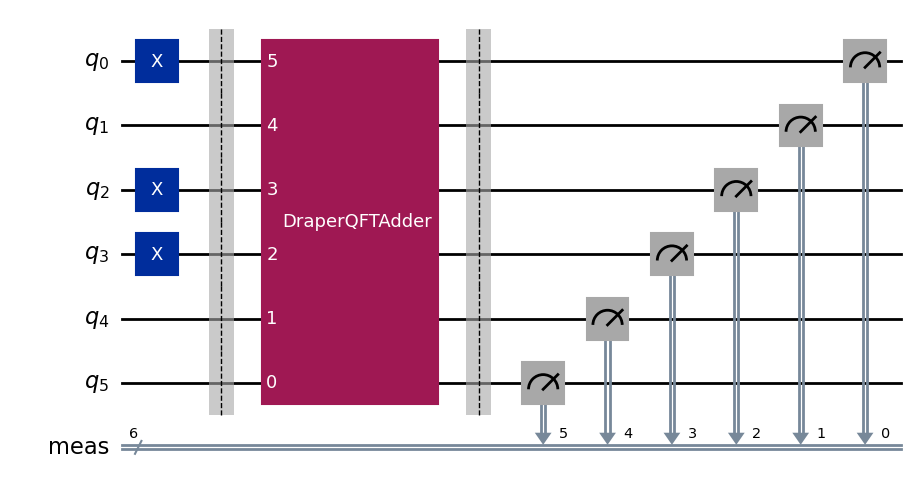

In [166]:
# test
qc = QuantumCircuit(6)
a = '001'
b = '101'
n = 3
for i in range(n):
    if a[i] == '1':
        qc.x(i)
    if b[i] == '1':
        qc.x(i+n)
qc.barrier()
adder = DraperQFTAdder(n).decompose()
qc.append(adder, range(6))
qc.measure_all()
qc = qc.reverse_bits()
qc.draw(output='mpl')

In [167]:
results = execute_qc(qc)
print(results)

{'001100': 1024}
